# Persian Spotify Analysis
Alright, listen up folks! We're about to dive into some serious data analysis and machine learning. We'll start with some EDA to get to know the data, and then we'll use machine learning to extract some juicy insights. So, let's not waste any time and get this journey started!

<div align="center">
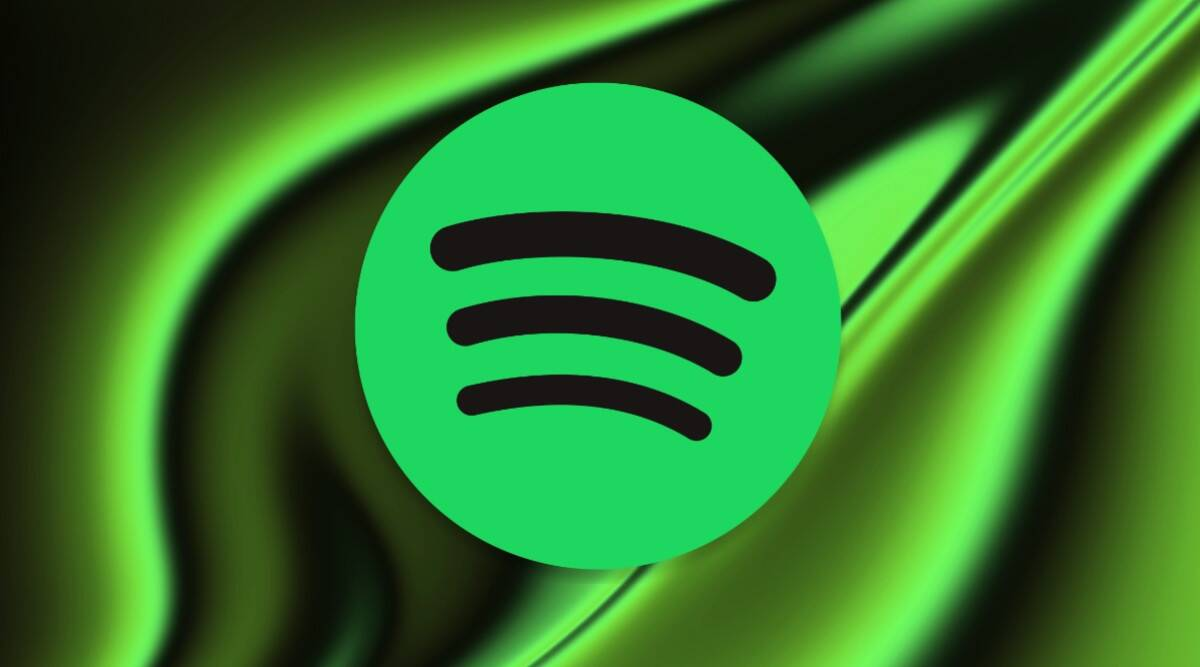
</div>

# Import Libraries

In [160]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix
)
from pprint import pprint 

In [ ]:
%pwd

# Load Spotify Dataset (CSV file)

In [161]:
spotify_df = pd.read_csv('Spotfiy_Persian_Artists.csv')
spotify_df.describe()

,disc_number,duration_ms,popularity,track_number,album_total_tracks,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10632.000000,1.063200e+04,931.000000,10632.000000,931.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000
mean,1.069225,2.888011e+05,20.113856,5.576279,9.707841,1981.687453,0.510869,0.496408,5.205982,-10.070847,0.373965,0.069843,0.609586,0.127399,0.193231,0.450537,119.381223,3.666384
std,0.386374,1.695220e+05,10.415865,4.533367,6.744375,232.376793,0.172341,0.241768,3.635221,4.605740,0.483877,0.071078,0.317795,0.284277,0.154764,0.239068,29.831699,0.637143
min,1.000000,3.996000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000975,0.000000,-37.404000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.035690e+05,13.000000,2.000000,5.000000,2005.000000,0.372000,0.298000,2.000000,-12.665750,0.000000,0.036100,0.332000,0.000000,0.095800,0.256750,95.114750,3.000000
50%,1.000000,2.536180e+05,20.000000,5.000000,10.000000,2010.000000,0.497000,0.489000,5.000000,-9.067000,0.000000,0.044900,0.725000,0.000088,0.133000,0.421000,120.076000,4.000000
75%,1.000000,3.337745e+05,28.000000,8.000000,12.000000,2016.000000,0.652000,0.693000,9.000000,-6.617750,1.000000,0.067225,0.882000,0.014900,0.250000,0.633000,138.032000,4.000000
max,4.000000,3.978450e+06,48.000000,32.000000,55.000000,2020.000000,0.964000,0.998000,11.000000,-0.626000,1.000000,0.939000,0.996000,0.995000,0.992000,0.980000,219.960000,5.000000


# EDA

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It helps us to better understand the given data, so that we can make sense out of it. If EDA is not done properly, it can hamper the further steps in the machine learning model building process. On the other hand, if done well, it may improve the efficacy of everything we do next. In order to perform EDA, we need to follow a systematic approach that involves several techniques. The following are some of the key steps involved in EDA:

1. Data Sourcing: This is the very first step of EDA, where we access data and load it into our system.

2. Data Cleaning: Once we have the data, we need to clean it by removing any inconsistencies, missing values, or outliers.

3. Univariate Analysis: In this step, we analyze each variable in isolation to understand its distribution, central tendency, and spread.

4. Bivariate Analysis: Here, we analyze the relationship between two variables to understand how they are related to each other.

5. Multivariate Analysis: This step involves analyzing the relationship between multiple variables to understand how they are related to each other.

By conducting EDA, we can turn an almost unusable dataset into a completely usable one. EDA helps to clean up a dataset and gives us a better understanding of the variables and the relationships between them. It is a creative process that involves generating questions about the data, searching for answers by visualizing, transforming, and modeling the data, and using what we learn to refine our questions and/or generate new ones.


In this section, we want to explore a bit dataset characteristics. To do so, you will answer specified questions below.

In [162]:
spotify_df.head()

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,NaN,Salar Aghili,سالار عقیلی,NaN,1,...,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,C,minor,C minor
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,NaN,Salar Aghili,سالار عقیلی,NaN,2,...,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,F,major,F major
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,NaN,Salar Aghili,سالار عقیلی,NaN,3,...,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,F,minor,F minor
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,NaN,Salar Aghili,سالار عقیلی,NaN,4,...,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,D,minor,D minor
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,NaN,Salar Aghili,سالار عقیلی,NaN,5,...,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,C,minor,C minor


In [163]:
spotify_df.columns

Index(['track_id', 'disc_number', 'duration_ms', 'explicit', 'track_name',
       'track_name_farsi', 'artist_name', 'artist_name_farsi', 'popularity',
       'track_number', 'album_href', 'album_id', 'album_name',
       'album_release_date', 'album_total_tracks', 'album_release_year',
       'track_href', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'key_name', 'mode_name',
       'key_mode'],
      dtype='object')

## Q: Get number of songs by each of the artists in descending order

In [164]:
# To be completed
df2=spotify_df.groupby(['artist_name'])['artist_name'].count().sort_values(ascending=False)
print(df2)

artist_name
Mohammadreza Shajarian    554
Hossein Alizadeh          545
Reza Sadeghi              507
Dariush                   465
Alireza Eftekhari         439
                         ... 
Nasser Abdollahi           22
Mohammad Golriz            17
Ebrahim Monsefi            16
Farman Fathalian           10
Koveyti Poor                9
Name: artist_name, Length: 69, dtype: int64


## Q: Get the average duration of songs by each of the artists in minutes

In [165]:
# To be completed
df3=spotify_df.groupby(['artist_name'])['duration_ms'].mean().sort_values(ascending=False)/60000
df3.name='duration_minute'
print(df3)

artist_name
Kayhan Kalhor       7.627583
Hatam Asgari        7.155098
Iraj Bastami        7.060861
Shahram Nazeri      6.852404
Hesameddin Seraj    6.720927
                      ...   
Macan Band          3.222035
Mazyar Fallahi      3.198591
Sasy                3.131618
Soheil Nafissi      3.063580
Peyman Yazdanian    2.461610
Name: duration_minute, Length: 69, dtype: float64


## Q: list of artist's unique names

In [166]:
# To be completed
df4=list(spotify_df['artist_name'].unique())
print(df4)

['Salar Aghili', 'Mohsen Yeganeh', 'Mehdi Yarrahi', 'Mohammadreza Shajarian', 'Morteza Pashaei', 'Hesameddin Seraj', 'Mohammad Esfahani', 'Mohsen Chavoshi', 'Reza Sadeghi', 'Abdolhosein Mokhtabad', 'Alireza Assar', 'Roozbeh Nematollahi', 'Hossein Alizadeh', 'Peyman Yazdanian', 'Kayhan Kalhor', 'Siavash Ghomayshi', 'Benyamin Bahadori', 'Alireza Eftekhari', 'Majid Akhshabi', 'Faramarz Aslani', 'Iraj Bastami', 'Ehsan Khajeh Amiri', 'Alireza Ghorbani', 'Parviz Meshkatian', 'Mohammad Reza Lotfi', 'Dang Show', 'Nasser Abdollahi', 'Soheil Nafissi', 'Farhad Mehrad', 'Afshin Moghaddam', 'Koveyti Poor', 'Mohammad Golriz', 'Abbas Ghaderi', 'Javad Yassari', 'Sattar', 'Mohsen Sharifian', 'Babak Jahanbakhsh', 'Mazyar Fallahi', 'Mohammad Alizadeh', 'Farzad Farzin', 'Ali Zand Vakili', 'Amirabbas Golab', 'Hamid Askari', 'Mohsen Namjoo', 'Hamed Homayoun', 'Kaveh Deylami', 'Hatam Asgari', 'Hamid Hami', 'Shahram Shabpareh', 'Moein', 'Hassan Shamaizadeh', 'Faramarz Assef', 'Dariush', 'Amir Tataloo', 'Rasta

## Q: Plot average duration of tracks by year

Text(0.5, 1.0, 'average duration of tracks by year')

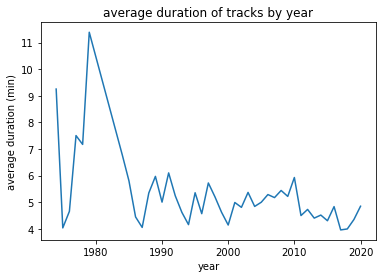

In [167]:
# To be completed
df5=spotify_df.groupby('album_release_year').mean().drop(0)['duration_ms']/60000
plt.plot(df5)
plt.ylabel('average duration (min)')
plt.xlabel('year')
plt.title('average duration of tracks by year')

## Q: Plot average loudness of tracks by year

Text(0.5, 1.0, 'average loudness by year')

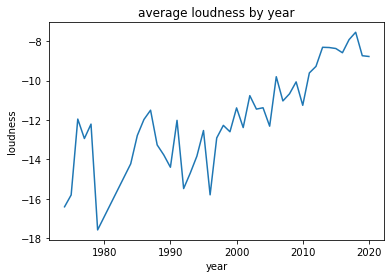

In [168]:
# To be completed
df6=spotify_df.groupby('album_release_year').mean().drop(0)['loudness']
plt.plot(df6)
plt.xlabel('year')
plt.ylabel('loudness')
plt.title('average loudness by year')

## Q: Music attributes of songs over the years


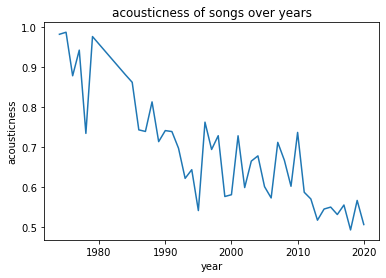

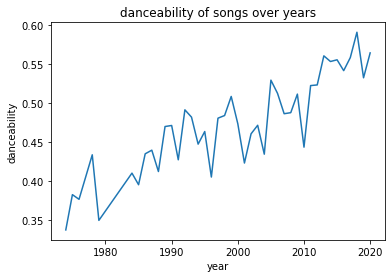

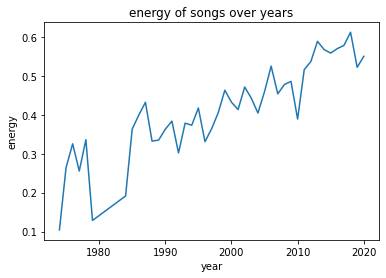

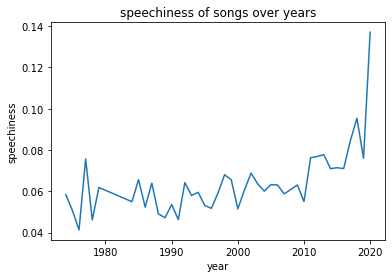

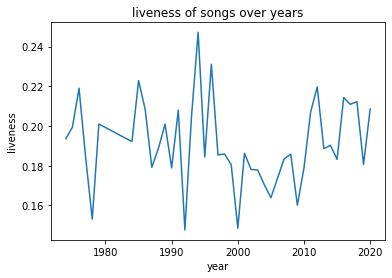

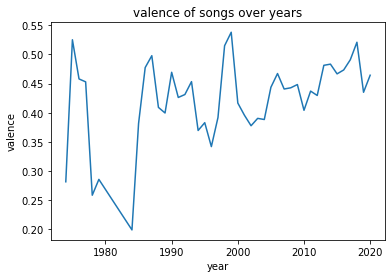

In [169]:
# the columns that we are interseted in
target_cols = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for target in target_cols:
    plt.figure()
    plt.plot(spotify_df.groupby('album_release_year').mean().drop(0)[target])
    plt.xlabel('year')
    plt.ylabel(target)
    plt.title(f'{target} of songs over years')

# To be completed

## Q: Plot top 10 popular tracks (Bar Chart)

Text(0.5, 1.0, '10 popular tracks')

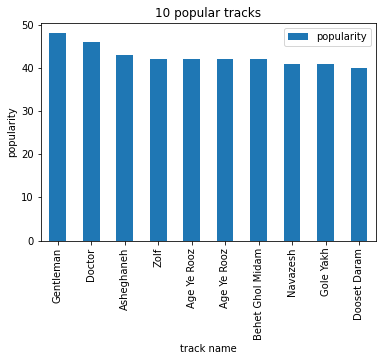

In [170]:
# To be completed
df7=spotify_df.sort_values('popularity',ascending=False)[0:10]
df7.plot(x='track_name',y='popularity',kind='bar')
plt.xlabel('track name')
plt.ylabel('popularity')
plt.title('10 popular tracks')


## Q: Plot top 10 popular artist (Bar Chart)

Text(0.5, 1.0, 'top 10 popular artists')

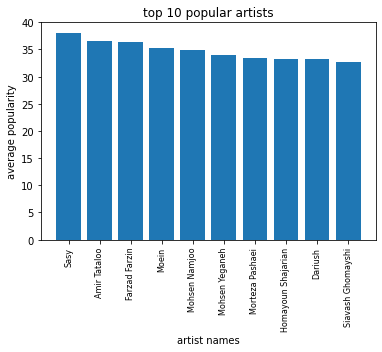

In [171]:
# To be completed
plt.bar(spotify_df.groupby("artist_name").mean().sort_values('popularity', ascending=False)["popularity"][0:10].index, spotify_df.groupby("artist_name").mean().sort_values('popularity', ascending=False)["popularity"][0:10])
plt.xticks(rotation=90, fontsize=8)
plt.ylabel("average popularity")
plt.xlabel("artist names")
plt.title("top 10 popular artists")

## Q: Plot correlation matrix's heatmap
What are the most correlated features with `duration_ms` and `popularity`?

<AxesSubplot:>

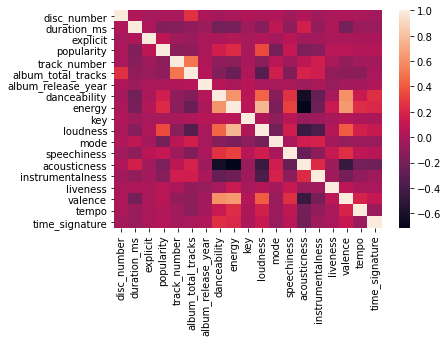

In [172]:
# To be completed
sns.heatmap(spotify_df.corr())

In [173]:
# To be completed
pop_most_cor=spotify_df.corr()['popularity'].sort_values(ascending= False).index[1]
print(f'most correlated feature with popularity is {pop_most_cor}')
dur_most_cor=spotify_df.corr()['duration_ms'].sort_values(ascending= False).index[1]
print(f'most correlated feature with duration_ms is {dur_most_cor}')

most correlated feature with popularity is loudness
most correlated feature with duration_ms is acousticness


## Q: Plot box-plot for each feature 
Compare box-plot values of `energy` and `liveness`

{'whiskers': [<matplotlib.lines.Line2D at 0x1f7af1083d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f7af108a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f7af108070>,
 'medians': [<matplotlib.lines.Line2D at 0x1f7af112190>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f7af1124f0>,
 'means': []}

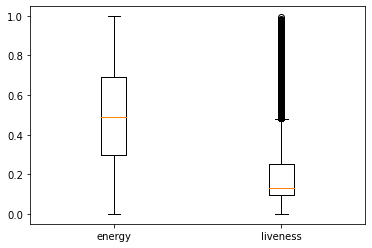

In [174]:
# To be completed
plt.boxplot(spotify_df[['energy', 'liveness']], labels=['energy', 'liveness'])

## Q: Missing values 
How many `nan` values are there in each column?

In [175]:
# To be completed
for col in spotify_df.columns:
    v=spotify_df[spotify_df[col].isna()==True].shape[0]
    print(f'{col}: {v}')
    

track_id: 0
disc_number: 0
duration_ms: 0
explicit: 0
track_name: 0
track_name_farsi: 10020
artist_name: 0
artist_name_farsi: 0
popularity: 9701
track_number: 0
album_href: 9701
album_id: 0
album_name: 0
album_release_date: 0
album_total_tracks: 9701
album_release_year: 0
track_href: 0
danceability: 0
energy: 0
key: 0
loudness: 0
mode: 0
speechiness: 0
acousticness: 0
instrumentalness: 0
liveness: 0
valence: 0
tempo: 0
time_signature: 0
key_name: 144
mode_name: 144
key_mode: 144


# Handling nan values of dataframe
- Fill categorical features with "None"
- Fill numerical features with appropriate approach(mean, median or any imputation). Explain your choice.

In [186]:
# To be completed
fill_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
fill_none = SimpleImputer(missing_values=np.nan,strategy='constant', fill_value= 'None')

spotify_df[['track_name_farsi','album_href','key_name','mode_name','key_mode',]] = fill_none.fit_transform(spotify_df[['track_name_farsi','album_href','key_name','mode_name','key_mode',]])
spotify_df[['popularity']] = fill_mean.fit_transform(spotify_df[['popularity']])

I fill None for categorical features and I fill mean for numerical features

# Determine your desired features here

In [176]:
music_feature_cols = ['duration_ms','explicit','danceability','energy','key','loudness','speechiness','acousticness',
                      'instrumentalness','liveness','valence','tempo',
    # To be completed
]

In [177]:
tracks_feature_df = spotify_df[music_feature_cols + ['artist_name']].dropna()
tracks_feature_df

,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_name
0,446880,False,0.437,0.390,0,-7.170,0.0299,0.839,0.000035,0.1360,0.3300,131.913,Salar Aghili
1,851920,False,0.379,0.146,5,-10.008,0.0414,0.970,0.000360,0.0812,0.3460,105.634,Salar Aghili
2,293160,False,0.437,0.453,5,-5.392,0.0349,0.664,0.002070,0.1100,0.5010,94.651,Salar Aghili
3,648720,False,0.488,0.138,2,-12.287,0.0451,0.915,0.006580,0.2120,0.4450,110.967,Salar Aghili
4,273480,False,0.301,0.443,0,-5.702,0.0334,0.657,0.000008,0.1200,0.4100,148.053,Salar Aghili
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,397505,False,0.356,0.499,4,-10.805,0.0452,0.946,0.005460,0.3530,0.3960,146.591,Shahram Nazeri
10628,3522173,False,0.318,0.163,5,-17.538,0.0690,0.982,0.061400,0.6670,0.1610,72.379,Shahram Nazeri
10629,3402706,False,0.213,0.218,8,-15.865,0.0350,0.883,0.019400,0.2630,0.1390,86.645,Shahram Nazeri
10630,3342733,False,0.242,0.304,8,-13.286,0.0369,0.842,0.223000,0.7980,0.2100,77.819,Shahram Nazeri


## Feature Preprocessing
In this section, you should preprocess desired features to get suitable for using in machine learning models. 

In [178]:
# To be completed
label = LabelEncoder()
label_artist_name=tracks_feature_df['artist_name'].unique()
label.fit(label_artist_name)
tracks_feature_df['artist_name'] = label.transform(tracks_feature_df['artist_name'])
#label_explicit= ['False', 'True']
#label.fit(label_explicit)
#tracks_feature_df['explicit'] = label.transform(tracks_feature_df['explicit'])
scaler = StandardScaler()
tracks_feature_df[['duration_ms','danceability', 'energy','key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']] = scaler.fit_transform(tracks_feature_df[['duration_ms','danceability', 'energy','key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']])
tracks_feature_df.head()

,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_name
0,0.932542,False,-0.428643,-0.440144,-1.432162,0.629863,-0.561985,0.721928,-0.448047,-0.369816,-0.504217,0.420102,58
1,3.321961,False,-0.765201,-1.449424,-0.056665,0.013646,-0.400182,1.134163,-0.446904,-0.723920,-0.437288,-0.460848,58
2,0.025714,False,-0.428643,-0.179551,-0.056665,1.015921,-0.491636,0.171232,-0.440888,-0.537822,0.211093,-0.829030,58
3,2.123240,False,-0.132704,-1.482515,-0.881964,-0.481195,-0.348124,0.961087,-0.425022,0.121278,-0.023160,-0.282070,58
4,-0.090383,False,-1.217813,-0.220915,-1.432162,0.948610,-0.512741,0.149205,-0.448140,-0.473204,-0.169569,0.961163,58


## Visualize Dataset Features using Dimension Reduction models (e.g. PCA)

(10632, 2)


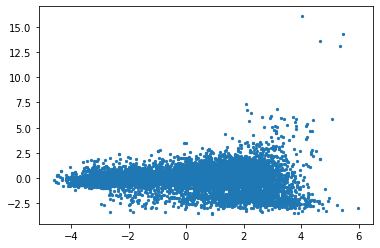

In [179]:
pca = PCA(n_components=2)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)

(10632, 3)


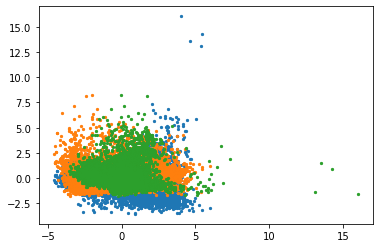

In [180]:
pca = PCA(n_components=3)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 2], s=5)
plt.scatter(tracks_feature_visual[:, 1], tracks_feature_visual[:, 2], s=5)

## Regression

In [187]:
# Set random seed to make results reproducible 
RANDOM_SEED = 42

In [188]:
label = LabelEncoder()
df = spotify_df.copy()
label_name=df['artist_name'].unique()
label.fit(label_name)
df['artist_name'] = label.transform(df['artist_name'])
regression_features = ['loudness','danceability','artist_name'
    # Your desired features columns-I choose most correlated features with popularity
]

x=df.loc[:, regression_features].values
y=df.loc[:,'popularity'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=RANDOM_SEED)

In this section, you should use `LinearRegression` class in scikit-learn library to implement regression algorithm. note that you should pass suitable parameters to get better results.

In [189]:
regressor = LinearRegression(
    # pass parameters here
)
regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

20.389564645440483
[0.06351841 0.22329178 0.00694606]


## Evaluate Regression Algorithm

In [190]:
y_pred = regressor.predict(x_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_output

,Actual,Predicted
0,13.000000,20.041790
1,20.113856,20.540297
2,20.113856,20.525000
3,20.113856,20.116077
4,20.113856,19.934797
...,...,...
3185,20.113856,20.195195
3186,12.000000,20.245763
3187,20.113856,19.614156
3188,20.113856,20.007814


In [191]:
#autograde
#Checking the accuracy of Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9560833002611895
Mean Squared Error: 8.795815503977845
Root Mean Squared Error: 2.965774014313607


# Classification

## Prepare Labels

In [192]:
sonnati_artists = ['Salar Aghili', 'Mohammadreza Shajarian', 'Hesameddin Seraj',
       'Mohammad Esfahani', 'Abdolhosein Mokhtabad', 'Hossein Alizadeh', 
       'Kayhan Kalhor', 'Alireza Eftekhari', 'Iraj Bastami', 'Alireza Ghorbani', 
       'Parviz Meshkatian', 'Mohammad Reza Lotfi', 'Ali Zand Vakili', 'Kaveh Deylami', 
       'Hatam Asgari', 'Homayoun Shajarian', 'Shahram Nazeri']

## Add `is_sonnati` feature column 
Using `sonnati_artist` list, add new feature column `is_sonnati` that determines a song whether a song is sonnati

In [193]:
# To be completed
cor_artist_name = df.corr()['artist_name'].sort_values(ascending=False)
#print(cor_artist_name.index)
label_album=df['album_name'].unique()
label.fit(label_album)
df['album_name'] = label.transform(df['album_name'])
features_classification=['album_name','track_number','album_total_tracks','disc_number','instrumentalness','mode','tempo','key','danceability'
                  ,'time_signature','liveness','valence','energy','duration_ms','speechiness']
#I choose most correlated features with artist_name
tracks_feature_df = df[features_classification + ['artist_name']].dropna()
def is_sonnati(name):
    if name in sonnati_artists:
        return 1
    return 0

tracks_feature_df['is_sonnati'] = spotify_df['artist_name'].apply(is_sonnati)
tracks_feature_df = tracks_feature_df.drop(columns=['artist_name'])

Index(['artist_name', 'track_number', 'popularity', 'disc_number',
       'instrumentalness', 'album_total_tracks', 'mode', 'tempo', 'key',
       'danceability', 'time_signature', 'liveness', 'valence', 'energy',
       'duration_ms', 'speechiness', 'explicit', 'acousticness', 'loudness',
       'album_release_year'],
      dtype='object')


In [194]:
tracks_feature_df.describe()

,album_name,track_number,album_total_tracks,disc_number,instrumentalness,mode,tempo,key,danceability,time_signature,liveness,valence,energy,duration_ms,speechiness,is_sonnati
count,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,9.310000e+02,931.000000,931.000000
mean,1028.644468,4.031149,9.707841,1.012889,0.089234,0.268528,120.369567,5.189044,0.530203,3.636950,0.206827,0.495412,0.528268,2.892023e+05,0.073776,0.308271
std,634.862682,3.759160,6.744375,0.160125,0.244572,0.443432,29.863127,3.678290,0.180570,0.578549,0.173933,0.241840,0.231802,1.222702e+05,0.069893,0.462027
min,10.000000,1.000000,1.000000,1.000000,0.000000,0.000000,48.076000,0.000000,0.154000,1.000000,0.033400,0.038000,0.009740,4.786600e+04,0.024800,0.000000
25%,481.000000,1.000000,5.000000,1.000000,0.000000,0.000000,98.005500,2.000000,0.368000,3.000000,0.097250,0.296000,0.345000,2.065240e+05,0.035000,0.000000
50%,1038.000000,3.000000,10.000000,1.000000,0.000044,0.000000,120.888000,5.000000,0.530000,4.000000,0.133000,0.496000,0.529000,2.573850e+05,0.044800,0.000000
75%,1600.000000,6.000000,12.000000,1.000000,0.003910,1.000000,138.223000,9.000000,0.682000,4.000000,0.277500,0.681500,0.719000,3.440465e+05,0.077700,1.000000
max,2095.000000,23.000000,55.000000,4.000000,0.971000,1.000000,219.960000,11.000000,0.926000,5.000000,0.975000,0.980000,0.981000,1.749693e+06,0.476000,1.000000


## Create Classification Dataset

In [195]:
x = tracks_feature_df.reset_index().drop(columns=['is_sonnati']).values
y = tracks_feature_df['is_sonnati'].values

In [196]:
print(f'{x.shape=}')
print(f'{y.shape=}')

x.shape=(931, 16)
y.shape=(931,)


In [197]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True)

## Choose a Model and Report the Evaluation Metrics

`fit_and_eval` function takes two parameters:
- scikit-learn classification model
- dataset object (that is a tuple of `x` and `y`) 


you should just instantiate your model and pass your desired parameters and then get the result of testing over test part of dataset.

In [198]:
#autograde
def fit_and_eval(model, dataset):
    """
    Train scikit-learn model on given dataset
    
    model: scikit-learn model
    dataset: tuple of x's and y's (whole data without any split)
    
    return:
        dict: evaluation metrics report
    """
    eval_metrics = {}
    x, y = dataset
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True
    )
    
    # train model
    classifier = make_pipeline(StandardScaler(), model)
    
    # ignore index column for training and inferencing
    classifier.fit(x_train[:, 1:], y_train)
    y_pred = classifier.predict(x_test[:, 1:])
    
    # export predictions to submit to kaggle
    pd.DataFrame({'id': x_test[:, 0].astype(int), 'predicted': y_pred}, dtype=str).to_csv('spotify_pred.csv', index=False)
    
    # evaluate model
    eval_metrics['acc'] = accuracy_score(y_test, y_pred)
    eval_metrics['precision'] = precision_score(y_test, y_pred)
    eval_metrics['recall'] = recall_score(y_test, y_pred)
    eval_metrics['f1'] = f1_score(y_test, y_pred)
    eval_metrics['confusion'] = confusion_matrix(y_test, y_pred)
    return eval_metrics

In [199]:
# here is an example
dataset = (x, y)
pprint(fit_and_eval(KNeighborsClassifier(n_neighbors=1), dataset))

{'acc': 0.9,
 'confusion': array([[175,  17],
       [ 11,  77]], dtype=int64),
 'f1': 0.8461538461538463,
 'precision': 0.8191489361702128,
 'recall': 0.875}


In [ ]:
#autograde
# the best model you want to be evaluated. Just pass do the same way as above cell
